In [1]:
from qmio import QmioRuntimeService
from qmiotools.integrations.qiskitqmio import QmioBackend,FakeQmio
from qmiotools.integrations.utils import Calibrations
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
service = QmioRuntimeService()
qubit = 8
nshots = 1000

### $|0\rangle$ state distribution

In [3]:
base = f'''OPENQASM 3;
defcalgrammar "openpulse";
measure ${qubit};'''

In [4]:
with service.backend(name = "qpu") as backend:
    res0 = backend.run(circuit = base, shots = nshots, res_format = 'raw')
    res0 = res0["results"].reshape((nshots,))

Waiting for resources


(array([  1.,   2.,   1.,   4.,   5.,   5.,   4.,   7.,   5.,   7.,  15.,
         28.,  28.,  50.,  47.,  74.,  95., 116., 115.,  87.,  82.,  81.,
         62.,  32.,  14.,  16.,   9.,   5.,   2.,   1.]),
 array([-1.98993861, -1.8194531 , -1.6489676 , -1.4784821 , -1.3079966 ,
        -1.13751109, -0.96702559, -0.79654009, -0.62605458, -0.45556908,
        -0.28508358, -0.11459808,  0.05588743,  0.22637293,  0.39685843,
         0.56734394,  0.73782944,  0.90831494,  1.07880044,  1.24928595,
         1.41977145,  1.59025695,  1.76074246,  1.93122796,  2.10171346,
         2.27219896,  2.44268447,  2.61316997,  2.78365547,  2.95414097,
         3.12462648]),
 <BarContainer object of 30 artists>)

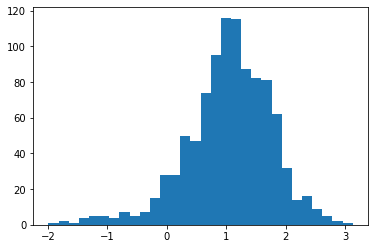

In [5]:
plt.hist(res0, bins = 30)

### $\pi$-pulse implementation

In [6]:
instructions_gate = f'''OPENQASM 3;
defcalgrammar "openpulse";
x ${qubit};
measure ${qubit};'''

In [7]:
with service.backend(name = "qpu") as backend:
    res_gate = backend.run(circuit = instructions_gate, shots = nshots, res_format = 'raw')
    res_gate = res_gate["results"].reshape((nshots,))

Waiting for resources


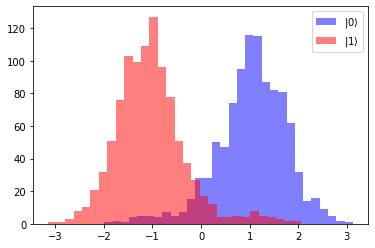

In [8]:
plt.hist(res0, bins = 30, fc=(0, 0, 1, 0.5), label = r'$|0\rangle$')
plt.hist(res_gate, bins = 30, fc=(1, 0, 0, 0.5), label = r'$|1\rangle$')
plt.legend()
plt.show()

In [9]:
fq = 4267100000.0
cal_dur = 3.2e-08
cal_amp = 0.1

In [10]:
instructions_pulse = f'''OPENQASM 3;
defcalgrammar "openpulse";

defcal custom_gate ${qubit}{{
    extern frame q{qubit}_drive;
    waveform wf = constant({cal_dur}, {cal_amp});
    play(q{qubit}_drive, wf);
}}

custom_gate ${qubit};
measure ${qubit};'''

In [11]:
print(instructions_pulse)

OPENQASM 3;
defcalgrammar "openpulse";

defcal custom_gate $8{
    extern frame q8_drive;
    waveform wf = constant(3.2e-08, 0.1);
    play(q8_drive, wf);
}

custom_gate $8;
measure $8;


In [12]:
with service.backend(name = "qpu") as backend:
    res_pulse = backend.run(circuit = instructions_pulse, shots = nshots, res_format = 'raw')
    try :
        res_pulse = res_pulse["results"].reshape((nshots,))
    except :
        print(res_pulse)

Waiting for resources


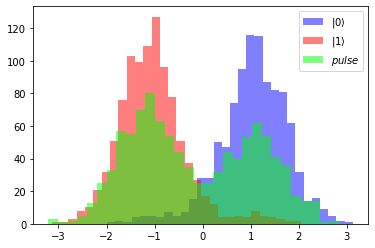

In [13]:
plt.hist(     res0, bins = 30, fc = (0, 0, 1, 0.5), label = r'$|0\rangle$')
plt.hist( res_gate, bins = 30, fc = (1, 0, 0, 0.5), label = r'$|1\rangle$')
plt.hist(res_pulse, bins = 30, fc = (0, 1, 0, 0.5), label = r'$pulse$')
plt.legend()
plt.show()

In [14]:
print(service)